# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import networkx as nx
import random
from cdlib import algorithms
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import os

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'bayanpy', 'leidenalg', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'leidenalg', 'infomap'}


2025-11-11 16:19:06.823184: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-11 16:19:06.862914: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-11 16:19:07.637589: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


---
# A simple neural network model for aggregation

Epoch 1/100


2025-11-11 16:19:07.859274: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - loss: 20397.8242 
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 20362.0547
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 20356.8730
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 20329.2578
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 20183.7461
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 19833.8789
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 19206.5918
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 18182.7617
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 16708.8867
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 15025.1387
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 13526.4375
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 12564.2197
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 11819.2412
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 10574.620

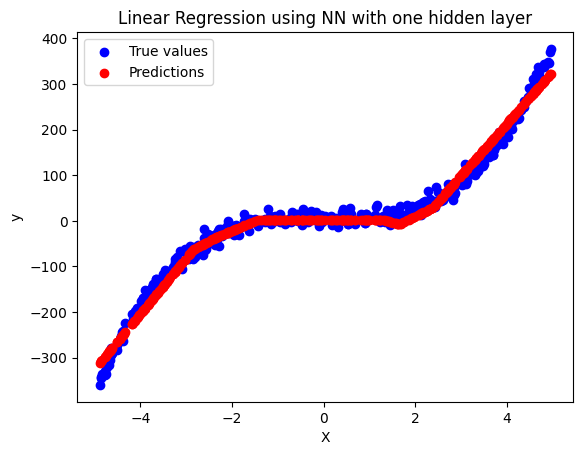

In [2]:
# ==============================
# 1. Generate simple linear data
# ==============================
np.random.seed(42)
X = np.linspace(-5, 5, 2000).reshape(-1, 1) 
y = 3*X*X*X + 4 + 10 * np.random.randn(2000, 1)
# y = np.sin(5*X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==============================
# 2. Define simple NN model
# ==============================
model = keras.Sequential([
    layers.Input(shape=(1,)),             # Input layer
    layers.Dense(5, activation='relu'),  # Hidden layer 
    layers.Dense(5, activation='relu'),  # Hidden layer 
    layers.Dense(5, activation='relu'),  # Hidden layer 
    layers.Dense(5, activation='relu'),  # Hidden layer 
    layers.Dense(1)                       # Output layer (linear regression)
])

# model.compile(optimizer='adam', 
#               loss='mse', 
#               metrics=['mae'])

model.compile(optimizer='adam', 
              loss='mse')

# ==============================
# 3. Train the model
# ==============================
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    verbose=1  # you can monitor loss manually
)

# ==============================
# 4. Evaluate & Predict
# ==============================
mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {mse:.4f}")
# print(f"Test MAE: {mae:.4f}")

y_pred = model.predict(X_test)

# ==============================
# 5. Plot results
# ==============================
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using NN with one hidden layer")
plt.legend()
plt.show()

# model analysis

In [3]:
weights = model.get_weights()

# Get all weights (as numpy arrays)
print("All weights (as numpy arrays):", weights)

# Get number of layers (excluding the InputLayer)
num_layers = len([layer for layer in model.layers if not isinstance(layer, keras.layers.InputLayer)])
print("Number of layers (excluding InputLayer):", num_layers)

# Get number of neurons in each layer
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'units'):
        print(f"Layer {i} ({layer.name}): {layer.units} neurons")
    else:
        print(f"Layer {i} ({layer.name}): Not a Dense layer")

# Show model summary (includes connections and shapes)
model.summary()

# To see which neuron is connected to which (for Dense layers, all-to-all):
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'weights') and layer.weights:
        w = layer.get_weights()[0]
        print(f"Layer {i} ({layer.name}) weight matrix shape: {w.shape}")
        # w.shape = (input_neurons, output_neurons)

All weights (as numpy arrays): [array([[-9.3991643e-01,  1.8745987e+00, -1.0720618e-03, -1.4141878e+00,
         1.5086547e+00]], dtype=float32), array([-2.6684499 , -0.6647761 , -0.04807055, -1.7804297 , -1.0291358 ],
      dtype=float32), array([[ 1.1354854 ,  2.7798576 , -0.49430257,  2.512843  ,  2.2251997 ],
       [-0.17303377,  0.19336599, -0.29377025,  1.3708429 , -0.5771109 ],
       [-0.4413903 , -0.19628151, -0.51284707,  0.01785635, -0.7536248 ],
       [ 1.387119  ,  1.488285  , -0.2737918 ,  1.0387555 ,  1.2392452 ],
       [-0.02791585, -0.31701466, -0.30740523,  0.8730687 ,  0.6721532 ]],
      dtype=float32), array([ 1.7532878,  0.3987382,  0.       , -1.6568121,  0.6624173],
      dtype=float32), array([[ 0.01470613, -2.8322551 ,  0.05795188, -4.0449715 ,  0.27880728],
       [-0.11312467, -1.442429  , -0.6272187 , -2.8911693 ,  1.1245372 ],
       [ 0.7459799 , -0.10770547, -0.72002095, -0.44704083, -0.6974575 ],
       [-0.22431684,  1.7119198 , -0.12668194,  1.1916

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 106 (424.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 214 (860.00 B)

Layer 0 (dense) weight matrix shape: (1, 5)
Layer 1 (dense_1) weight matrix shape: (5, 5)
Layer 2 (dense_2) weight matrix shape: (5, 5)
Layer 3 (dense_3) weight matrix shape: (5, 5)
Layer 4 (dense_4) weight matrix shape: (5, 1)


In [4]:
for i, w in enumerate(weights):
    print(f"weights[{i}].shape:", w[:])

weights[0].shape: [[-9.3991643e-01  1.8745987e+00 -1.0720618e-03 -1.4141878e+00
   1.5086547e+00]]
weights[1].shape: [-2.6684499  -0.6647761  -0.04807055 -1.7804297  -1.0291358 ]
weights[2].shape: [[ 1.1354854   2.7798576  -0.49430257  2.512843    2.2251997 ]
 [-0.17303377  0.19336599 -0.29377025  1.3708429  -0.5771109 ]
 [-0.4413903  -0.19628151 -0.51284707  0.01785635 -0.7536248 ]
 [ 1.387119    1.488285   -0.2737918   1.0387555   1.2392452 ]
 [-0.02791585 -0.31701466 -0.30740523  0.8730687   0.6721532 ]]
weights[3].shape: [ 1.7532878  0.3987382  0.        -1.6568121  0.6624173]
weights[4].shape: [[ 0.01470613 -2.8322551   0.05795188 -4.0449715   0.27880728]
 [-0.11312467 -1.442429   -0.6272187  -2.8911693   1.1245372 ]
 [ 0.7459799  -0.10770547 -0.72002095 -0.44704083 -0.6974575 ]
 [-0.22431684  1.7119198  -0.12668194  1.1916718   1.0166854 ]
 [-0.4209255  -1.7454379   0.28560326 -3.3237815   1.4450387 ]]
weights[5].shape: [ 0.         -0.05571236 -0.06456773 -1.1691144  -1.9372114 

In [5]:
weights

[array([[-9.3991643e-01,  1.8745987e+00, -1.0720618e-03, -1.4141878e+00,
          1.5086547e+00]], dtype=float32),
 array([-2.6684499 , -0.6647761 , -0.04807055, -1.7804297 , -1.0291358 ],
       dtype=float32),
 array([[ 1.1354854 ,  2.7798576 , -0.49430257,  2.512843  ,  2.2251997 ],
        [-0.17303377,  0.19336599, -0.29377025,  1.3708429 , -0.5771109 ],
        [-0.4413903 , -0.19628151, -0.51284707,  0.01785635, -0.7536248 ],
        [ 1.387119  ,  1.488285  , -0.2737918 ,  1.0387555 ,  1.2392452 ],
        [-0.02791585, -0.31701466, -0.30740523,  0.8730687 ,  0.6721532 ]],
       dtype=float32),
 array([ 1.7532878,  0.3987382,  0.       , -1.6568121,  0.6624173],
       dtype=float32),
 array([[ 0.01470613, -2.8322551 ,  0.05795188, -4.0449715 ,  0.27880728],
        [-0.11312467, -1.442429  , -0.6272187 , -2.8911693 ,  1.1245372 ],
        [ 0.7459799 , -0.10770547, -0.72002095, -0.44704083, -0.6974575 ],
        [-0.22431684,  1.7119198 , -0.12668194,  1.1916718 ,  1.0166854

---
# Graph aggregation of Neural Network

## Assumptions

1. Aggregation does not take bias into consideration and added later to the compressed network
2. Same activation function in a particular layer

## Converting nn into graph

In [6]:
# plotting nn graph

def draw_nn_graph(G, layers, node_size=1200, figsize=(24,16), y_spacing=3, x_spacing=4):
    """
    Visualize a neural network graph in a structured (layered) way.
    
    Args:
        G: networkx.DiGraph with edges having 'weight'
        layers: list of lists of node names
        node_size: size of the nodes
        figsize: tuple (width, height) for the plot. If None, auto-scale.
        y_spacing: vertical space between neurons
        x_spacing: horizontal space between layers
    """
    pos = {}

    # Assign positions layer by layer
    for i, layer in enumerate(layers):
        y_offset = (len(layer) - 1) * y_spacing / 2
        for j, node in enumerate(layer):
            pos[node] = (i * x_spacing, j * y_spacing - y_offset)

    # Auto figure size
    if figsize is None:
        width = x_spacing * (len(layers) + 1)
        height = max(len(layer) for layer in layers) * y_spacing + 2
        figsize = (width, height)

    plt.figure(figsize=figsize)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="lightblue", edgecolors="k")
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # Draw edges with weights
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle="->", arrowsize=15)

    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.axis("off")
    plt.show()

In [7]:
def nn_to_graph_with_bias(model):
    weights = model.get_weights()

    layer_index = 0
    neuron_index = 0

    G = nx.Graph()

    layers = []

    for l in range(len(weights)):
        if l%2==0:
            pass
        else:
            continue

        # adding weights from previous layer to next layer
        rows = weights[l].shape[0]
        columns = weights[l].shape[1]

        for r in range(rows):
            G.add_node(f"{layer_index}_{r}", layer=layer_index)

        G.add_node(f"{layer_index}_{rows}", layer=layer_index)

        layer_index+=1

    layer_index=0
    
    for i in range(len(weights)):
        if i%2==0:
            pass
        else:
            continue

        # adding weights from previous layer to next layer
        rows = weights[i].shape[0]
        columns = weights[i].shape[1]

        neuron_list = []
        for r in range(rows):
            neuron_list.append(f"{layer_index}_{r}") #neurons adding to the layers list
            for c in range(columns):
                G.add_edge(f"{layer_index}_{r}", f"{layer_index+1}_{c}", weight=weights[i][r,c])

        # adding biases from previous layer to next layer
        number_of_biases = weights[i+1].shape[0]

        neuron_list.append(f"{layer_index}_{rows}") #neurons adding to the layers list
        for b in range(number_of_biases):
            G.add_edge(f"{layer_index}_{rows}", f"{layer_index+1}_{b}", weight=weights[i+1][b])

        layer_index+=1

        layers.append(neuron_list)

    # adding output layer in the layers list
    neuron_list = []
    for out in range(weights[-1].shape[0]):
        neuron_list.append(f"{layer_index}_{out}")

    layers.append(neuron_list)

    return G,layers

In [8]:
# converting neural network to digraph

def nn_to_digraph(model):
    weights = model.get_weights()

    print(weights)

    layer_index = 0
    
    G = nx.Graph()

    layers = []

    for l in range(len(weights)):
        if l%2==0:
            pass
        else:
            continue

        # adding weights from previous layer to next layer
        rows = weights[l].shape[0]
        columns = weights[l].shape[1]

        for r in range(rows):
            G.add_node(f"{layer_index}_{r}", layer=layer_index)

        # G.add_node(f"{layer_index}_{rows}", layer=layer_index)

        layer_index+=1

    layer_index=0
    
    for i in range(len(weights)):
        if i%2==0:
            pass
        else:
            continue

        # adding weights from previous layer to next layer
        rows = weights[i].shape[0]
        columns = weights[i].shape[1]

        neuron_list = []
        for r in range(rows):
            neuron_list.append(f"{layer_index}_{r}") #neurons adding to the layers list
            for c in range(columns):
                G.add_edge(f"{layer_index}_{r}", f"{layer_index+1}_{c}", weight=weights[i][r,c])

        # adding biases from previous layer to next layer
        # number_of_biases = weights[i+1].shape[0]

        # neuron_list.append(f"{layer_index}_{rows}") #neurons adding to the layers list
        # for b in range(number_of_biases):
        #     G.add_edge(f"{layer_index}_{rows}", f"{layer_index+1}_{b}", weight=weights[i+1][b])

        layer_index+=1

        layers.append(neuron_list)

    # adding output layer in the layers list
    neuron_list = []
    for out in range(weights[-1].shape[0]):
        neuron_list.append(f"{layer_index}_{out}")

    layers.append(neuron_list)

    return G,layers

# draw_nn_graph(G, layers)

In [9]:
# print([n for n, d in G.nodes(data=True) if d.get("layer") == 1])

# out_edges = list(G.edges('1_0', data=True))
# out_edges

def outgoing_weights(G, node):
    """
    Return a dict {target_node: weight}, for all nodes in G.
    If edge doesn't exist, weight=0.
    """
    result = {}
    for tgt in G.nodes():
        if G.has_edge(node, tgt):
            result[tgt] = G[node][tgt].get("weight", 0.0)
        else:
            result[tgt] = 0.0
    return result

# Example: all weights going from "L1_n0" to every node
# weights = outgoing_weights(G, "1_0")
# print(weights)

def X_create(G,layers):

    X = np.zeros((len(G.nodes())-len(layers[0])-len(layers[-1]),len(G.nodes())))
    # print(X.shape)

    i=0
    for layer in layers[1:-1]:
        # print(layer)
        for neuron in layer:
            # print(neuron)
            weights = outgoing_weights(G, neuron)
            # print(list(weights.values()))
            X[i]=list(weights.values())
            # print(X[i])
            # print(X[i],list(weights.values()))
            i+=1
            
    return X

# Finding best number of clusters using persistence method (Phase Transition)

In [10]:
# # import numpy as np
# from sklearn.cluster import KMeans
# # from sklearn.datasets import make_blobs
# # import matplotlib.pyplot as plt

# # --- Step 1: Helper to compute cluster covariance matrix ---
# def cluster_covariance(X, labels, centers):
#     k = len(centers)
#     covariances = []
#     for j in range(k):
#         cluster_points = X[labels == j]
#         if len(cluster_points) > 1:
#             cov = np.cov(cluster_points.T)
#         else:
#             cov = np.zeros((X.shape[1], X.shape[1]))
#         covariances.append(cov)
#     return covariances

# # --- Step 2: Compute beta_k for given k ---
# def compute_beta_k(X, k):
#     kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
#     covariances = cluster_covariance(X, kmeans.labels_, kmeans.cluster_centers_)
    
#     max_eig = 0
#     for cov in covariances:
#         eigvals = np.linalg.eigvalsh(cov)  # symmetric matrix
#         max_eig = max(max_eig, np.max(eigvals))

#     beta_k = 1 / (2 * max_eig) if max_eig > 0 else np.inf
#     return beta_k

# # --- Step 3: Main algorithm ---
# def persistence_clustering(X, k_max=10):
#     betas = []
#     for k in range(1, k_max + 1):
#         print(k)
#         beta_k = compute_beta_k(X, k)
#         betas.append(beta_k)

#     v = [np.log(betas[k]) - np.log(betas[k - 1]) for k in range(1, len(betas))]
#     print(v)
#     print(np.argmax(v))
#     k_true = np.argmax(v) + 2  # +1 because v[k] corresponds to k+1 clusters

#     return k_true, betas, v

# # --- Step 4: Example ---
# # X, y_true = make_blobs(n_samples=500, centers=7, n_features=2, cluster_std=0.6)

# k_true, betas, v = persistence_clustering(X, k_max=50)

# print(f"Estimated number of clusters (k_t): {k_true}")

# # --- Step 5: Plot ---
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.scatter(X[:,0], X[:,1], s=20)
# plt.title("Data Distribution")

# plt.subplot(1,2,2)
# plt.plot(range(2, len(v)+2), v, marker='o')
# plt.title("v(k) = log(beta_k) - log(beta_{k-1})")
# plt.xlabel("Number of clusters k")
# plt.ylabel("v(k)")
# plt.show()

# Neural Network aggregation using deterministic annealing

In [11]:
# calculating dissimilarity

def calculate_distortion(X, Y):
    """
    Calculates the squared Euclidean distance between each point in X and each centroid in Y.
    Args:
        X (np.ndarray): The data matrix of shape (M, N).
        Y (np.ndarray): The centroid matrix of shape (K, N).
    Returns:
        np.ndarray: A distance matrix of shape (M, K).
    """
    # X_sum_sq is a column vector of shape (M, 1)
    X_sum_sq = np.sum(X**2, axis=1, keepdims=True)
    
    # Y_sum_sq is a row vector of shape (1, K)
    Y_sum_sq = np.sum(Y**2, axis=1, keepdims=True).T
    
    # D is the squared Euclidean distance matrix using the formula:
    # ||x - y||^2 = ||x||^2 + ||y||^2 - 2 * x.T * y
    D = X_sum_sq + Y_sum_sq - 2 * X @ Y.T
    return D

In [12]:
# deterministic annealing algorithm

def DA_algo_graph(X, K):
    np.random.seed(42)
    random.seed(42)

    #Get the dimensions of the data matrix
    M, N = X.shape

    # %% Setting for DA parameters
    # K = 3                     # Number of clusters
    Tmin = 0.05                 # Minimum temperature
    alpha = 0.99                # Annealing rate
    PERTURB = 0.005            # Perturbation factor
    STOP = 1e-5                 # Stopping criterion for inner loop
    T = 80                      # Initial temperature

    # Px is the weight for each data point, assuming uniform weights
    Px = np.full((M, 1), 1 / M)

    # Y is the matrix of cluster centroids, initialized to the weighted mean of the data.
    initial_mean = (Px.T @ X).reshape(1, -1)

    Y = np.tile(initial_mean, (K, 1))

    # Start the annealing process
    while T >= Tmin:
        L_old = np.inf
        while True:
            # Calculate distortion matrix D
            D = calculate_distortion(X, Y)

            # Calculate the probability matrix P using the softmax function
            D_bar = D - np.min(D, axis=1, keepdims=True)
            num = np.exp(-D_bar / T)
            den = np.sum(num, axis=1, keepdims=True)
            P = num / den

            # Update the cluster centroids Y
            Py = P.T @ Px
            Py[Py == 0] = 1e-10  # Avoid division by zero
            Y = (P.T @ (X * Px)) / Py.reshape(-1, 1)

            # Add a small random perturbation to the centroids
            Y += PERTURB * np.random.rand(*Y.shape)
            
            # Calculate the loss function L
            L = -T * Px.T @ np.log(np.sum(np.exp(-D_bar / T), axis=1, keepdims=True))

            # Check for convergence
            if np.linalg.norm(L - L_old) < STOP:
                break

            # Update L_old for the next iteration
            L_old = L

        # Decrease the temperature for the next outer loop iteration
        T *= alpha

    return P,Y

In [13]:
def prob_recreate(P):
    for i in range(len(P)):
        # print(f'----------i={i}----------')
        max_index = np.argmax(P[i])
        for j in range(len(P[i])):
            if j==max_index:
                P[i,j]=1
            else:
                P[i,j]=0

    return P    

In [14]:
def build_custom_model(neuron_list, activations, weights_list):
    """
    neuron_list: list of int, number of neurons per layer (excluding input layer)
    activations: list of str or None, activation for each layer (last can be None or 'linear')
    weights_list: list of [weights, bias] for each layer, shapes must match the model
    """
    assert len(neuron_list) == len(activations) == len(weights_list), "Lengths must match"
    
    model = keras.Sequential()
    # Input layer
    model.add(layers.Input(shape=(weights_list[0][0].shape[0],)))
    # Hidden and output layers
    for n, act, w in zip(neuron_list, activations, weights_list):
        model.add(layers.Dense(n, activation=act))
    # Set weights
    for i, w in enumerate(weights_list):
        model.layers[i+1].set_weights(w)  # i+1 because Input is not a Dense layer
    return model

# Example usage:
# Suppose you want 50, 50, 50, 50, 50, 1 neurons (like your model)
# and you have weights_list = [[W0, b0], [W1, b1], ..., [W5, b5]]
# activations = ['relu', 'relu', 'relu', 'relu', 'relu', None]
# model = build_custom_model([50,50,50,50,50,1], ['relu']*5+['linear'], weights_list)

# Experiment: layerwise aggregation

In [15]:
G, layers_list = nn_to_digraph(model)

X = X_create(G, layers_list)

number_of_supernodes = [5,3,3,5]
compressed_neuron_list = []
compressed_weights_list = []

bias_index = 1
prob_list = []
Y_list = []

compressed_neuron_list.append(len(layers_list[0]))

i=0
for layer,supernodes in zip(layers_list[1:-1],number_of_supernodes):

    # print(layer)
    # print(i,i+len(layer))
    P,Y = DA_algo_graph(X[i:i+len(layer),:],supernodes)

    # print('Y',Y)

    P = prob_recreate(P)

    # print(Y[0])

    prob_list.append(P)
    Y_list.append(Y)

    compressed_neuron_list.append(Y.shape[0])

    if i==0:
        compressed_weights_list.append([weights[0]@P,weights[1].reshape(1, weights[1].shape[0])@P])
    else:
        compressed_weights_list.append([Y[:,i:i+len(layer)]])

    i+=len(layer)

    bias_index+=2

compressed_neuron_list.append(len(layers_list[-1]))
# print(compressed_neuron_list)

# number_of_supernodes = 5
# P,Y = DA_algo_graph(X,number_of_supernodes)
# P = prob_recreate(P)

[array([[-9.3991643e-01,  1.8745987e+00, -1.0720618e-03, -1.4141878e+00,
         1.5086547e+00]], dtype=float32), array([-2.6684499 , -0.6647761 , -0.04807055, -1.7804297 , -1.0291358 ],
      dtype=float32), array([[ 1.1354854 ,  2.7798576 , -0.49430257,  2.512843  ,  2.2251997 ],
       [-0.17303377,  0.19336599, -0.29377025,  1.3708429 , -0.5771109 ],
       [-0.4413903 , -0.19628151, -0.51284707,  0.01785635, -0.7536248 ],
       [ 1.387119  ,  1.488285  , -0.2737918 ,  1.0387555 ,  1.2392452 ],
       [-0.02791585, -0.31701466, -0.30740523,  0.8730687 ,  0.6721532 ]],
      dtype=float32), array([ 1.7532878,  0.3987382,  0.       , -1.6568121,  0.6624173],
      dtype=float32), array([[ 0.01470613, -2.8322551 ,  0.05795188, -4.0449715 ,  0.27880728],
       [-0.11312467, -1.442429  , -0.6272187 , -2.8911693 ,  1.1245372 ],
       [ 0.7459799 , -0.10770547, -0.72002095, -0.44704083, -0.6974575 ],
       [-0.22431684,  1.7119198 , -0.12668194,  1.1916718 ,  1.0166854 ],
       [-0.

In [16]:
# # new method - graph aggregation

# model_no_of_neurons = [layer.units for layer in model.layers if hasattr(layer, 'units')][:-1]

# weights_compressed_list = []

# j=0
# neuron_indices = 1
# for i,supernodes in zip(range(len(prob_list)) , number_of_supernodes):
#     print(i,j)

#     if supernodes == model_no_of_neurons[i]:
#         compressed_weight = weights[j]
#     # elif j==0 and supernodes != model_no_of_neurons[i]:
#     #     compressed_weight = weights[j]@prob_list[i]             
#     else:
#         compressed_weight = Y_list[i-1][:,neuron_indices:neuron_indices+len(prob_list[i])] @ prob_list[i]
        
#     compressed_bias = weights[j+1].reshape(1, weights[j+1].shape[0]) @ prob_list[i]
#     compressed_bias = compressed_bias.flatten()
#     weights_compressed_list.append([compressed_weight,compressed_bias])

#     j+=2
#     neuron_indices += len(prob_list[i])

#     print('compressed weights',compressed_weight,compressed_bias)
#     print('neuron indices',neuron_indices)

# # weights[-2].T@prob_list[-1]
# weights_compressed_list.append([prob_list[-1].T @ weights[-2],weights[-1]])

# for i in weights_compressed_list:
#     print(i[0].shape,i[1].shape)

In [17]:
model.get_weights()

[array([[-9.3991643e-01,  1.8745987e+00, -1.0720618e-03, -1.4141878e+00,
          1.5086547e+00]], dtype=float32),
 array([-2.6684499 , -0.6647761 , -0.04807055, -1.7804297 , -1.0291358 ],
       dtype=float32),
 array([[ 1.1354854 ,  2.7798576 , -0.49430257,  2.512843  ,  2.2251997 ],
        [-0.17303377,  0.19336599, -0.29377025,  1.3708429 , -0.5771109 ],
        [-0.4413903 , -0.19628151, -0.51284707,  0.01785635, -0.7536248 ],
        [ 1.387119  ,  1.488285  , -0.2737918 ,  1.0387555 ,  1.2392452 ],
        [-0.02791585, -0.31701466, -0.30740523,  0.8730687 ,  0.6721532 ]],
       dtype=float32),
 array([ 1.7532878,  0.3987382,  0.       , -1.6568121,  0.6624173],
       dtype=float32),
 array([[ 0.01470613, -2.8322551 ,  0.05795188, -4.0449715 ,  0.27880728],
        [-0.11312467, -1.442429  , -0.6272187 , -2.8911693 ,  1.1245372 ],
        [ 0.7459799 , -0.10770547, -0.72002095, -0.44704083, -0.6974575 ],
        [-0.22431684,  1.7119198 , -0.12668194,  1.1916718 ,  1.0166854

In [18]:
Y_list[-1][:,-1].reshape(len(Y_list[-1]),1).shape

(5, 1)

In [19]:
# new method - graph aggregation + addition in 1st weight matrix and last weight matrix

weights_compressed_list = []

j=0
neuron_indices = 1
for i in range(len(prob_list)):
    print(i,j)
    if j==0:
        compressed_weight = weights[j]@prob_list[i]
    else:
        compressed_weight = Y_list[i-1][:,neuron_indices:neuron_indices+len(prob_list[i])] @ prob_list[i]
    compressed_bias = weights[j+1].reshape(1, weights[j+1].shape[0]) @ prob_list[i]
    compressed_bias = compressed_bias.flatten()
    weights_compressed_list.append([compressed_weight,compressed_bias])

    j+=2
    neuron_indices += len(prob_list[i])

    print(neuron_indices)

weights[-2].T@prob_list[-1]
weights_compressed_list.append([prob_list[-1].T @ weights[-2],weights[-1]])

for i in weights_compressed_list:
    print(i[0].shape,i[1].shape)

0 0
6
1 2
11
2 4
16
3 6
21
(1, 5) (5,)
(5, 3) (3,)
(3, 3) (3,)
(3, 5) (5,)
(5, 1) (1,)


In [20]:
# # new method - graph aggregation + addition in 1st weight matrix

# weights_compressed_list = []

# j=0
# neuron_indices = 1
# for i in range(len(prob_list)):
#     print(i,j)
#     if j==0:
#         compressed_weight = weights[j]@prob_list[i]
#     else:
#         compressed_weight = Y_list[i-1][:,neuron_indices:neuron_indices+len(prob_list[i])] @ prob_list[i]
#     compressed_bias = weights[j+1].reshape(1, weights[j+1].shape[0]) @ prob_list[i]
#     compressed_bias = compressed_bias.flatten()
#     weights_compressed_list.append([compressed_weight,compressed_bias])

#     j+=2
#     neuron_indices += len(prob_list[i])

#     print(neuron_indices)

# weights[-2].T@prob_list[-1]
# weights_compressed_list.append([Y_list[-1][:,-1].reshape(len(Y_list[-1]),1),weights[-1]])

# for i in weights_compressed_list:
#     print(i[0].shape,i[1].shape)

In [21]:
weights_compressed_list[-1]

[array([[-2.25886798],
        [ 0.77260101],
        [ 2.13571   ],
        [-2.12090564],
        [ 2.25342131]]),
 array([1.4495499], dtype=float32)]

In [22]:
# method - only addition

# weights_compressed_list = []

# j=0
# for i in range(len(prob_list)):
#     # print(i,j)
#     if j==0:
#         compressed_weight = weights[j]@prob_list[i]
#     else:
#         compressed_weight = prob_list[i-1].T @ weights[j] @ prob_list[i]
#     compressed_bias = weights[j+1].reshape(1, weights[j+1].shape[0])@prob_list[i]
#     compressed_bias = compressed_bias.flatten()
#     weights_compressed_list.append([compressed_weight,compressed_bias])
#     j+=2

# weights[-2].T@prob_list[-1]
# weights_compressed_list.append([prob_list[-1].T@weights[-2],weights[-1]])

# for i in weights_compressed_list:
#     print(i[0].shape,i[1].shape)

In [23]:
activations = []

for i, layer in enumerate(model.layers):
    if hasattr(layer, 'activation'):
        # print(f"Layer {i}: {layer.activation.__name__}")
        activations.append(layer.activation.__name__)
    else:
        print(f"Layer {i}: No activation (e.g., InputLayer)")

# Build the model
compressed_model = keras.Sequential()

# Add input layer
compressed_model.add(layers.Input(shape=(compressed_neuron_list[0],)))

# Add hidden and output layers
for i in range(len(compressed_neuron_list) - 1):
    compressed_model.add(layers.Dense(
        units=compressed_neuron_list[i + 1],
        activation=activations[i]
    ))

# Set the weights
for i, layer in enumerate(compressed_model.layers):
    # print(i)
    layer.set_weights(weights_compressed_list[i])

# Display model summary
compressed_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

# Experiment: Global Aggregation

In [24]:
# G.nodes

In [25]:
# G, layers_list = nn_to_digraph(model)

# X = X_create(G,layers_list)
# print(X,X.shape)

In [26]:
# number_of_supernodes = 10
# P,Y = DA_algo_graph(abs(X),number_of_supernodes)
# P = prob_recreate(P)
# print(P,P.shape,'\n',Y,Y.shape)

# Evaluation of the original and compressed model on the test data

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


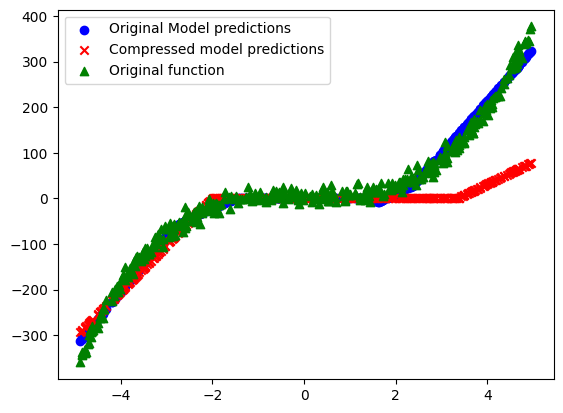

In [27]:
X_train

y1 = model.predict(X_test)
y2 = compressed_model.predict(X_test)

# Plot comparison
plt.scatter(X_test, y1, label="Original Model predictions", color="blue")
plt.scatter(X_test, y2, label="Compressed model predictions", color="red", marker="x")
plt.scatter(X_test, y_test, label="Original function", color="green", marker="^")
plt.legend()
plt.show()

In [28]:
compressed_model.compile(optimizer='adam', 
              loss='mse')

y_pred_original = model.predict(X_test)
y_pred_compressed = compressed_model.predict(X_test)

print('------------compressed model--------------')
test_loss = compressed_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
r2_compressed = r2_score(y_test, y_pred_compressed)
print("R² score:", r2_compressed)

print('------------original model--------------')
test_loss_or = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_or}")
r2_original = r2_score(y_test, y_pred_original)
print("R² score:", r2_original)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
------------compressed model--------------
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7970.9614 
Test Loss: 7970.96142578125
R² score: 0.6040061224812261
------------original model--------------
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 314.9862 
Test Loss: 314.9862060546875
R² score: 0.9843516218395529


# Retraining the compressed model and evaluation of both model on the test data

In [29]:
# compressed_model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
#     loss='mse',
#     metrics=['mae']
# )

history = compressed_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    verbose=1  # you can monitor loss manually
)

y_pred_original = model.predict(X_test)
y_pred_compressed = compressed_model.predict(X_test)

print('------------compressed model--------------')
test_loss = compressed_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
r2_compressed = r2_score(y_test, y_pred_compressed)
print("R² score:", r2_compressed)

print('------------original model--------------')
test_loss_or = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_or}")
r2_original = r2_score(y_test, y_pred_original)
print("R² score:", r2_original)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: 5829.1787 
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 4372.5161
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 3289.0879
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 2390.1711
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 1706.0194
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 1255.9735
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 1009.0226
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 862.2661
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 723.3605
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 582.9438
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 514.8429
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 483.1532
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 467.1420
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 456.0067
Epoch 1

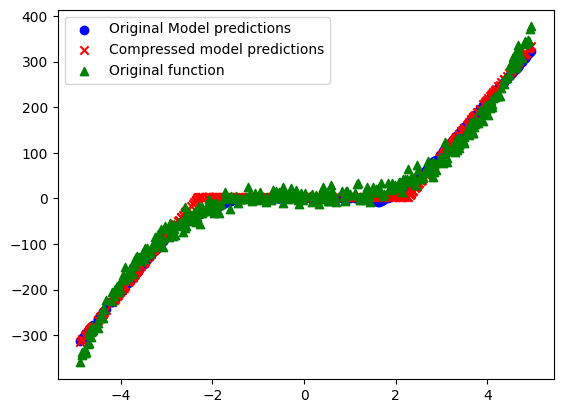

In [30]:
# Plot comparison
plt.scatter(X_test, y_pred_original, label="Original Model predictions", color="blue")
plt.scatter(X_test, y_pred_compressed, label="Compressed model predictions", color="red", marker="x")
plt.scatter(X_test, y_test, label="Original function", color="green", marker="^")
plt.legend()
plt.show()

## Model size difference

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 106 (424.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 214 (860.00 B)

In [32]:
compressed_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200 (804.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134 (540.00 B)

In [33]:
# Save model and Check file size
directory = 'models'
os.makedirs(directory, exist_ok=True)

model.save(f'{directory}/original_model_with_bias.keras')
size_bytes = os.path.getsize(f'{directory}/original_model_with_bias.keras')
size_mb_or = size_bytes / (1024 * 1024)
print(f"Original Model size: {size_mb_or:.2f} MB")

compressed_model.save(f'{directory}/original_model_with_bias_compressed.keras')
size_bytes = os.path.getsize(f'{directory}/original_model_with_bias_compressed.keras')
size_mb_co = size_bytes / (1024 * 1024)
print(f"Compressed Model size: {size_mb_co} MB")

print(f'{size_mb_or/size_mb_co} times compression in storage')

Original Model size: 0.04 MB
Compressed Model size: 0.034569740295410156 MB
1.0130762227923529 times compression in storage


In [34]:
param_count = model.count_params()
# Assuming float32 (4 bytes per parameter)
size_bytes = param_count * 4
size_mb_or = size_bytes / (1024 * 1024)
print(f"Approximate original model size in memory: {size_mb_or} MB")

param_count = compressed_model.count_params()
# Assuming float32 (4 bytes per parameter)
size_bytes = param_count * 4
size_mb_co = size_bytes / (1024 * 1024)
print(f"Approximate compressed model size in memory: {size_mb_co} MB")

print(f'{size_mb_or/size_mb_co} times compression in memory')

Approximate original model size in memory: 0.00040435791015625 MB
Approximate compressed model size in memory: 0.00025177001953125 MB
1.606060606060606 times compression in memory


# end

---

In [35]:
import torch
import torch.nn as nn

def spectral_norm(W):
    """Compute spectral (operator) norm using largest singular value."""
    if W.ndim == 2:
        return torch.linalg.svdvals(W).max().item()
    else:
        # for conv layers: flatten kernel to 2D
        return torch.linalg.svdvals(W.flatten(1)).max().item()

def network_bound(f_net, g_net, x, activation_lip=1.0):
    """
    Computes an upper bound on ||g(x) - f(x)|| based on parameter differences.
    Assumes both networks have same architecture and activation type.
    
    Parameters:
    f_net, g_net : torch.nn.Sequential (same structure)
    x : torch.Tensor (input sample)
    activation_lip : float (Lipschitz constant, e.g., 1 for ReLU)
    """
    assert len(f_net) == len(g_net), "Networks must have same architecture"
    
    # Gather layer weights/biases
    W_f, b_f, W_g, b_g = [], [], [], []
    for layer1, layer2 in zip(f_net, g_net):
        if isinstance(layer1, nn.Linear):
            W_f.append(layer1.weight.data.clone())
            b_f.append(layer1.bias.data.clone())
            W_g.append(layer2.weight.data.clone())
            b_g.append(layer2.bias.data.clone())

    L = len(W_f)
    K = activation_lip
    
    # Compute operator norms
    Wnorms = [spectral_norm(W) for W in W_f]
    Delta_W = [spectral_norm(W2 - W1) for W1, W2 in zip(W_f, W_g)]
    Delta_b = [torch.norm(b2 - b1).item() for b1, b2 in zip(b_f, b_g)]
    
    # Input norm
    x_norm = torch.norm(x).item()
    
    # Compute layerwise product terms
    total_bound = 0.0
    for ell in range(L):
        # product of later layer norms
        prod_norm = 1.0
        for j in range(ell + 1, L):
            prod_norm *= Wnorms[j]
        
        term = (K ** (L - ell)) * prod_norm * (
            Delta_W[ell] * x_norm + Delta_b[ell]
        )
        total_bound += term
    
    return total_bound

# -------------------------------------------------------
# Example usage:
# -------------------------------------------------------
if __name__ == "__main__":
    # Define two simple 2-layer networks with small parameter difference
    f_net = nn.Sequential(
        nn.Linear(4, 5),
        nn.ReLU(),
        nn.Linear(5, 1)
    )

    g_net = nn.Sequential(
        nn.Linear(4, 5),
        nn.ReLU(),
        nn.Linear(5, 1)
    )

    # Small perturbation in g_net parameters
    with torch.no_grad():
        for p in g_net.parameters():
            p.add_(0.01 * torch.randn_like(p))

    x = torch.randn(4)

    bound = network_bound(f_net, g_net, x, activation_lip=1.0)
    diff = torch.norm(g_net(x) - f_net(x)).item()

    print(f"Analytical upper bound: {bound:.5f}")
    print(f"Actual output difference: {diff:.5f}")


Analytical upper bound: 2.09342
Actual output difference: 0.17785
